In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (16, 9)



/var/folders/qm/6sftmgzj257f31tbfcdmd4g40000gn/T/ipykernel_46948/973749565.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


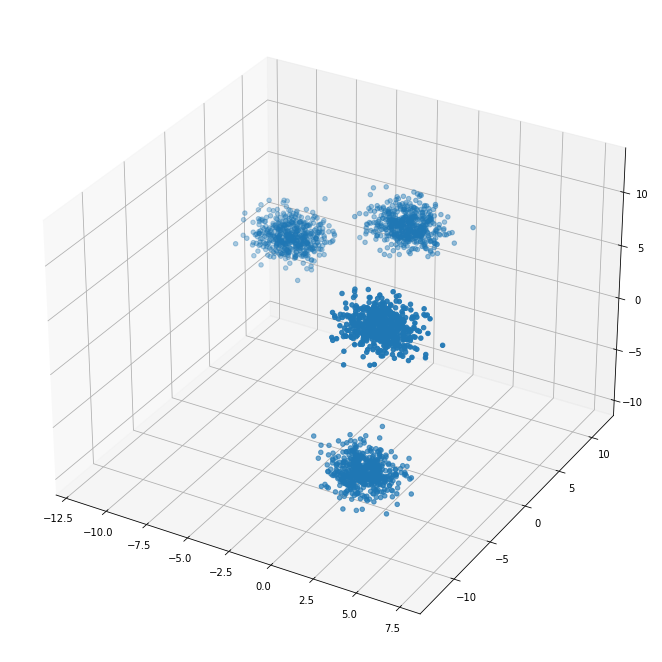

In [2]:

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=2000, n_features=3, centers=4, random_state=42)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])



In [3]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_



/var/folders/qm/6sftmgzj257f31tbfcdmd4g40000gn/T/ipykernel_46948/1456065186.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


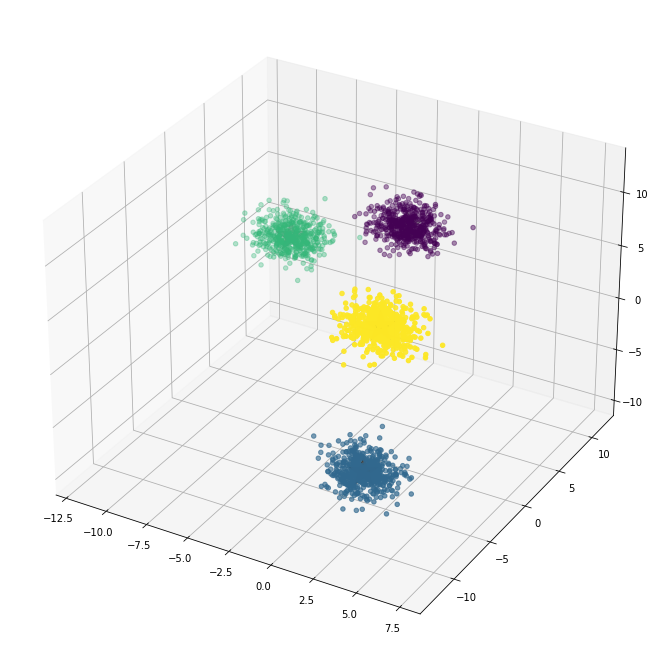

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [5]:
from river.compat import River2SKLClusterer
from river.cluster.k_means import KMeans as K_Means
import river.cluster as cluster
from river import stream

In [6]:
k_means = K_Means(n_clusters=4, halflife=0.5, sigma=10, seed=42)


In [7]:
n=0
for i, (x, _) in enumerate(stream.iter_array(X)):
    k_means = k_means.learn_one(x)
print(k_means.centers)

{0: defaultdict(..., {0: 3.5385401135503862, 1: -10.003434961087837, 2: 10.087426628462856}), 1: defaultdict(..., {0: 2.3502396812527784, 1: -6.484280163408798, 2: -6.246036672030451}), 2: defaultdict(..., {0: -3.676832744691494, 1: 7.856114769675272, 2: 4.259573001435799}), 3: defaultdict(..., {})}


In [8]:
print(C)

[[ 4.16204746 -9.63358192  9.34056749]
 [-8.80720574  7.21446781  1.97030877]
 [ 2.00567849 -6.88619792 -6.86832767]
 [-2.45211164  9.12461284  4.6116675 ]]
